In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('/content/drive/MyDrive/Prices.xlsx',
                 sheet_name='Daily',
                 usecols='A:B'
                #  index_col='Name'
                 )

In [4]:
# setting Name as index

df = df.set_index('Name')


In [5]:
df.head()

,USD
Name,
1978-12-29,226.00
1979-01-01,226.00
1979-01-02,226.80
1979-01-03,218.60
1979-01-04,223.15


In [6]:
df.index  # confirmed it is a datetime index

DatetimeIndex(['1978-12-29', '1979-01-01', '1979-01-02', '1979-01-03',
               '1979-01-04', '1979-01-05', '1979-01-08', '1979-01-09',
               '1979-01-10', '1979-01-11',
               ...
               '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
               '2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28'],
              dtype='datetime64[ns]', name='Name', length=11871, freq=None)

In [7]:
df.describe()

,USD
count,11871.00000
mean,771.24222
std,549.02328
min,216.85000
25%,356.87500
50%,431.20000
75%,1242.02500
max,2427.30000


In long term, trend is increasing.

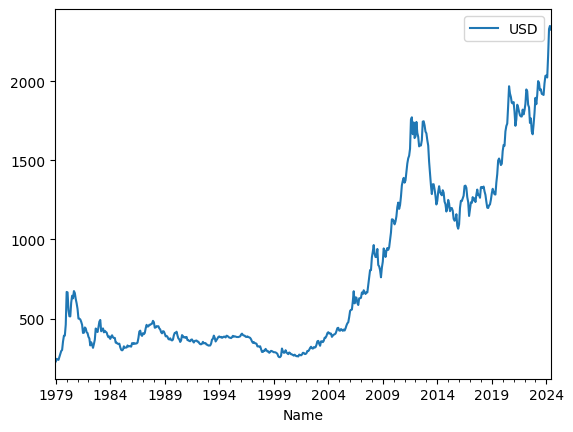

In [8]:
df.resample(rule='M').mean().plot(); # 1978 Dec-Curr

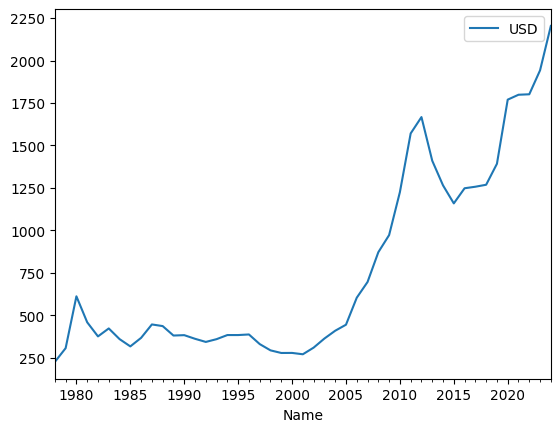

In [9]:
#This resample takes one year at a time and after that using mean func. calculates mean
#average and put that in 1st date of each year.
df.resample(rule='AS').mean().plot(); # AS means Year Start

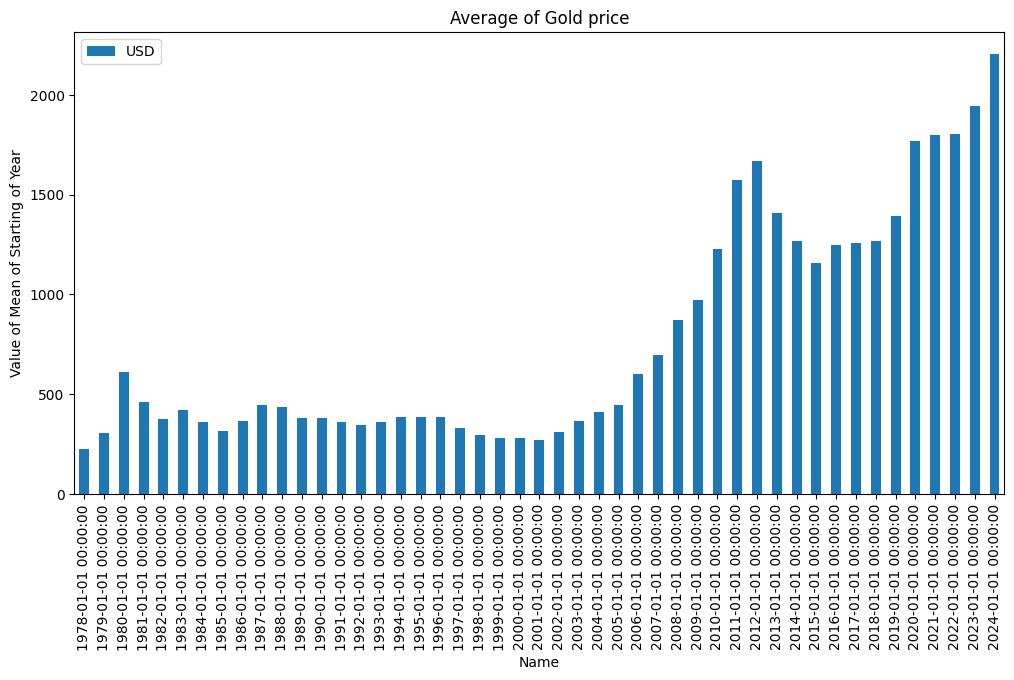

In [10]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Gold price', ylabel='Value of Mean of Starting of Year');

1year rolling window is catching the trend more clearly


<Axes: xlabel='Name'>

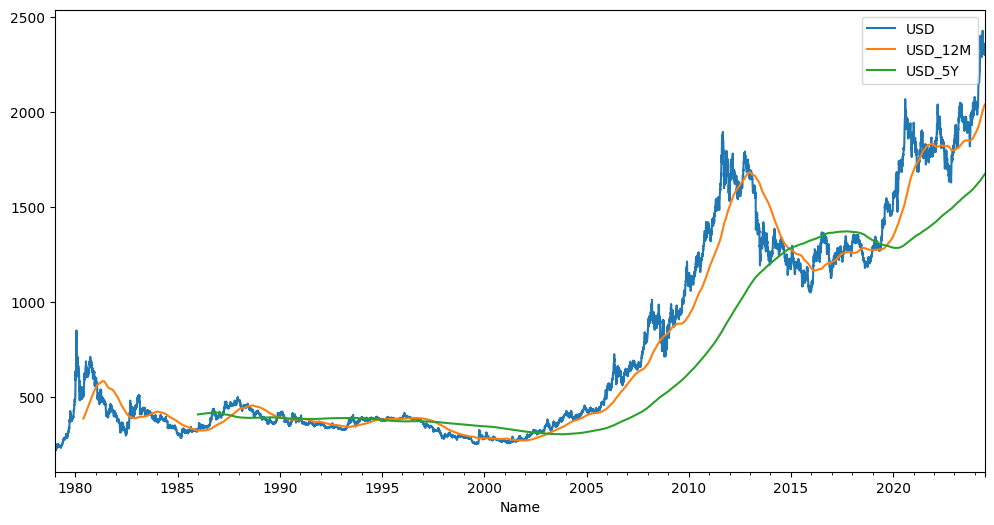

In [11]:
#This rolling function takes 364 previous values and particular value and takes
#average and put that value against that particular row.

df['USD_12M'] = df['USD'].rolling(window=365).mean()
df['USD_5Y'] = df['USD'].rolling(window=365*5+1).mean()
df[['USD','USD_12M','USD_5Y']].plot(figsize=(12,6))

In [12]:
df.head()

,USD,USD_12M,USD_5Y
Name,,,
1978-12-29,226.00,NaN,NaN
1979-01-01,226.00,NaN,NaN
1979-01-02,226.80,NaN,NaN
1979-01-03,218.60,NaN,NaN
1979-01-04,223.15,NaN,NaN


In [13]:
df=df.drop(["USD_12M","USD_5Y"],axis=1)

the Gold prices from 1980 to around 2005, we in the range of $200 - $700, and after that, the gold prices have had an exponential increase in them:

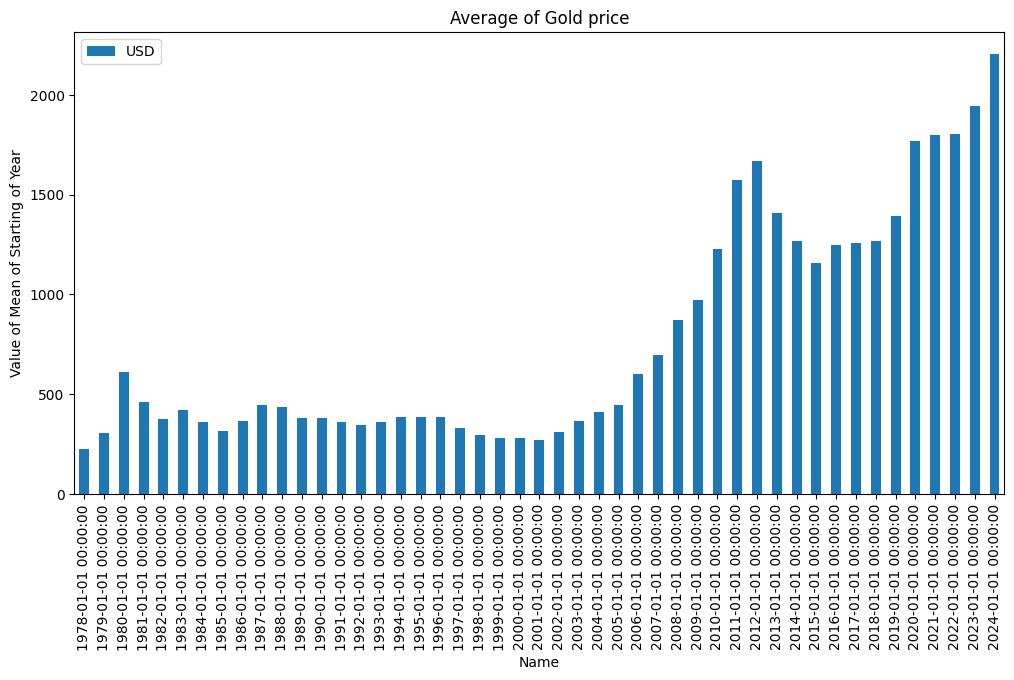

In [14]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Gold price', ylabel='Value of Mean of Starting of Year');

**Moving Averages**

One of the things, that can tell us how often the data behaves unexpectedly is by plotting the moving averages along with the actual value/actual average. This will show us what the “intended” trend is, vs what the “actual” trend is at that point.

*   If the moving average aligns closely with the raw data, it suggests that the intended trend captures the overall behavior well.
*   In summary, moving averages help us understand the underlying trend by filtering out noise, while the raw data shows the actual behavior.







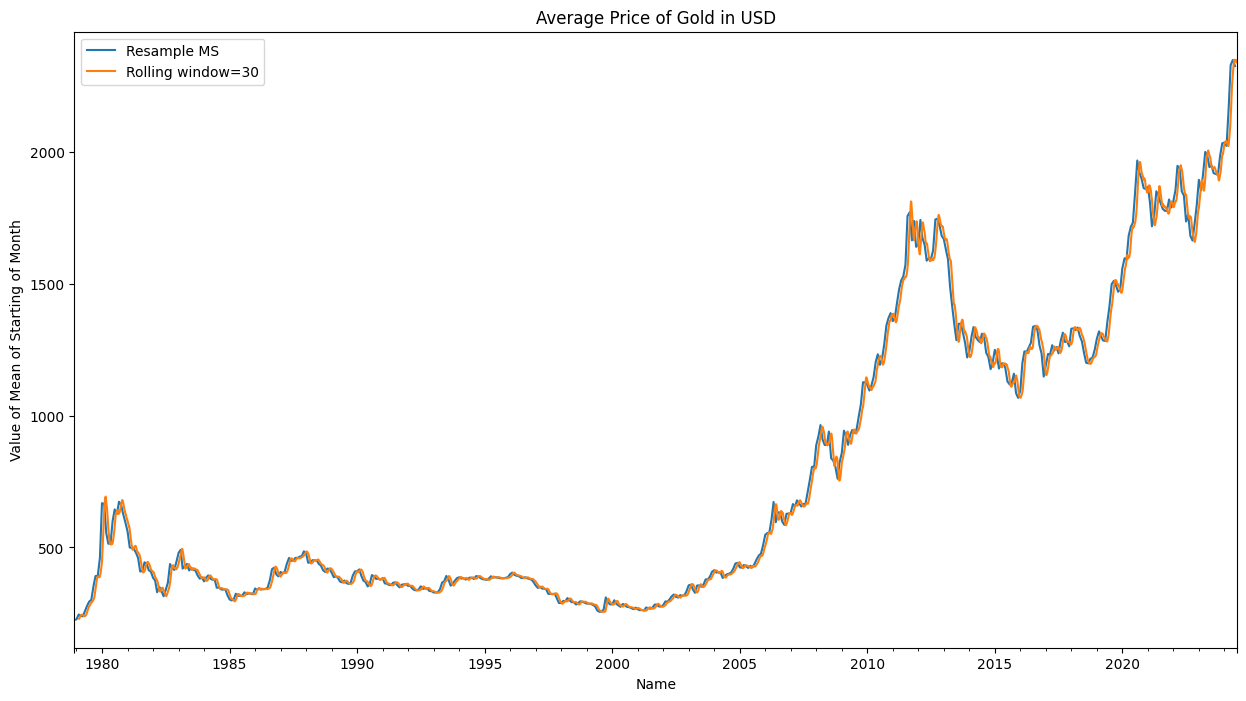

In [15]:
ax = df['USD'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS') # monthly resampled mean
ax.autoscale(tight=True)
df.rolling(window=30).mean()['USD'].plot(label='Rolling window=30') # monthly rolling windows/moving average
ax.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')
ax.legend()

Let's see for 2006-2024   Recent years

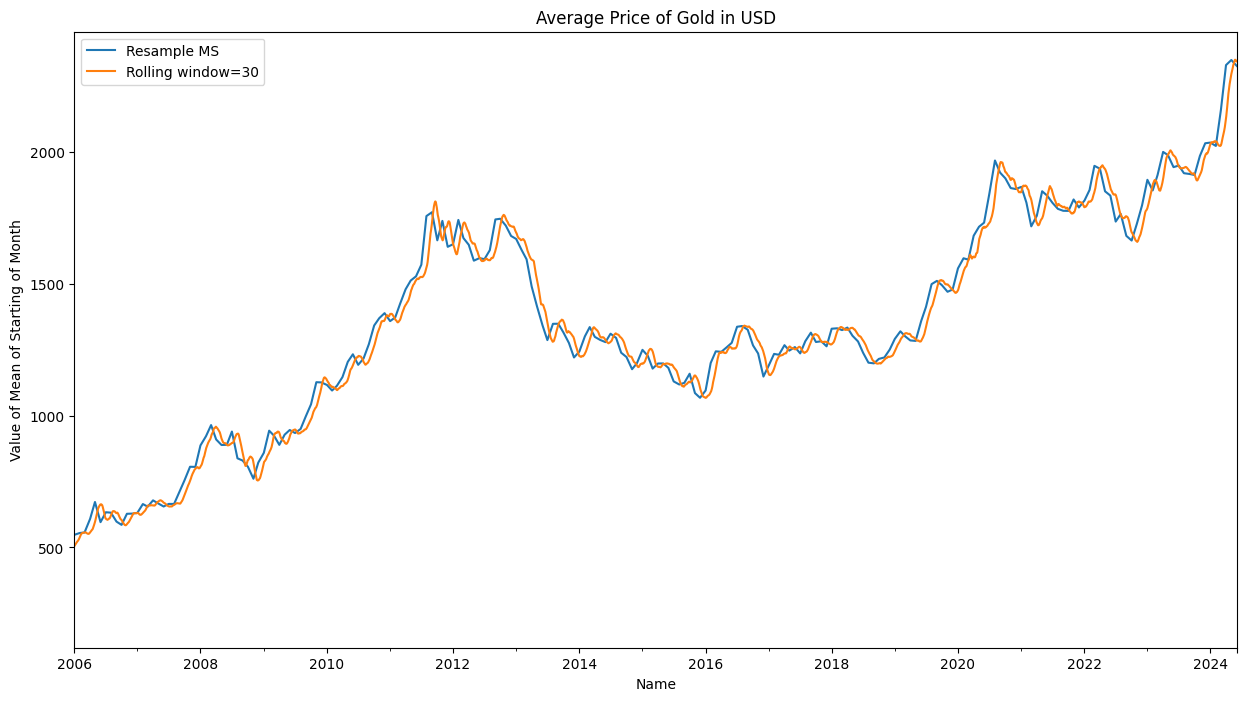

In [16]:
ax = df['USD'].resample(rule='M').mean().plot(xlim=['2006-01-01','2024-06-01'], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['USD'].plot(xlim=['2006-01-01','2024-06-01'],label='Rolling window=30')
ax.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')
ax.legend()

**Long Term Seasonality Testing**

Even if our time series is not additive(increasing by an almost constant factor in simple terms) in the whole data set, there can be some multiplicative seasonality over a long period.

<Axes: xlabel='Name'>

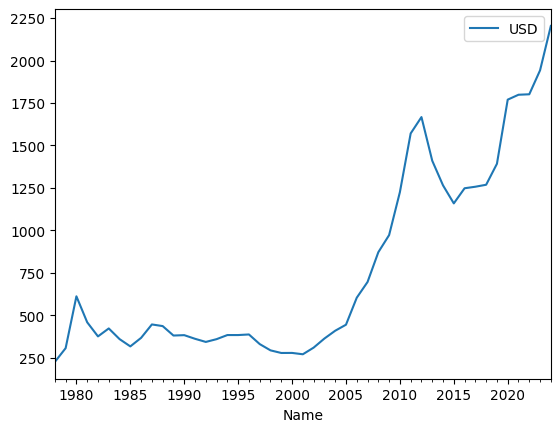

In [17]:
df.resample(rule='1y').mean().plot() #1y = 1 years

<Axes: xlabel='Name'>

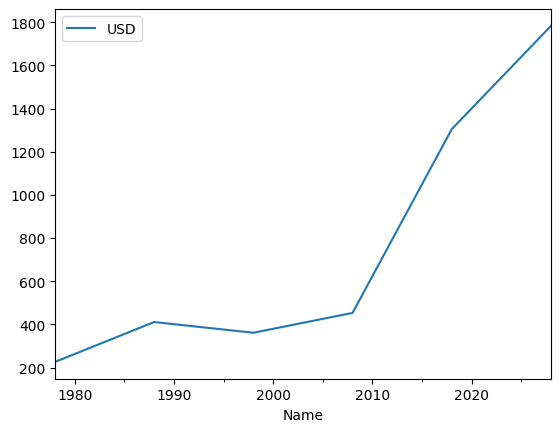

In [18]:
# for 10 years
df.resample(rule='10y').mean().plot()

<Axes: xlabel='Name'>

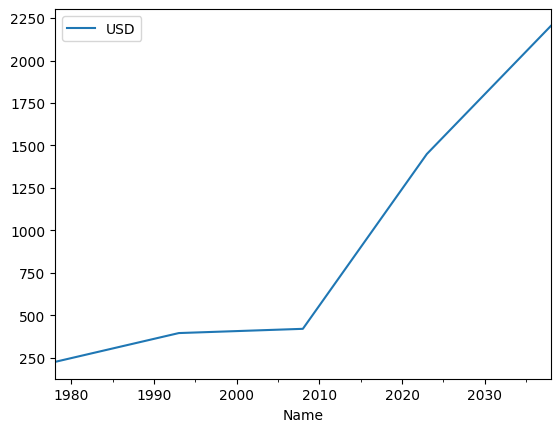

In [19]:
# for 10 years
df.resample(rule='15y').mean().plot()

We can see that 15 and 10 years on average have a simple pattern over time, so we can add a custom seasonality of 10 years or 15 years. Also, the average over 10/15 years do not have many cycles according to the graph, so we can use the lower Fourier value for custom seasonality.

**The End**

That's all about visualization